# (Fordgobike-tripdata)
## by (ElSayed Abdul-Monem ElSayed)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [41]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [42]:
df =pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### first we will do some data wrangling <br>
1.Drop null-values<br>
2.convert duration from sec to minutes to be more readable <br>
3.convert start_time and end_ time from object to date <br>
4.convert user_type from object to categorical data <br>
5.convert station's id from float to string <br>
6.convert bike_id from integer to str<br>
7.adding new columns contains the riders ages 

In [44]:
df.dropna(inplace=True)

In [45]:
df.shape

(174952, 16)

In [46]:
# Data Wrangling Steps 
df['duration_sec']=df['duration_sec'] / (60)
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)
df['user_type'] = df['user_type'].astype('category')
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)
df['member_age'] = 2021 - df['member_birth_year']

In [47]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  float64       
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

### What is the structure of your dataset?

 1.duration_sec             | 174952 non-null  float64       <br>
 2.start_time               | 174952 non-null  datetime64    <br>
 3.end_time                 | 174952 non-null  datetime64    <br>
 4.start_station_id         | 174952 non-null  object        <br>    
 5.start_station_name       | 174952 non-null  object        <br>
 6.start_station_latitude   | 174952 non-null  float64       <br>
 7.start_station_longitude  | 174952 non-null  float64       <br>
 8.end_station_id           | 174952 non-null  object        <br>
 9.end_station_name         | 174952 non-null  object        <br>
 10.end_station_latitude    | 174952 non-null  float64       <br>
 11.end_station_longitude   | 174952 non-null  float64       <br>
 12.bike_id                 | 174952 non-null  object        <br>
 13.user_type               | 174952 non-null  category      <br>
 14.member_birth_year       | 174952 non-null  float64       <br>
 15.member_gender           | 174952 non-null  object        <br>
 16.bike_share_for_all_trip | 174952 non-null  object  <br>
 17.member_age              | 174952 non-null  float64  

### What is/are the main feature(s) of interest in your dataset?

1.duration_sec <br>
2.start_time <br>
3.end_time <br>
4.start_station_id <br>
5.end_station_id <br>
6.bike_id <br>
7.user_type <br>
8.member_age <br>
9.member_gender <br>


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1.member_gender  <br>
2.start_time <br>
3.end_time <br>
4.user_type <br>
5.member_age <br>


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

<AxesSubplot:xlabel='member_gender', ylabel='count'>

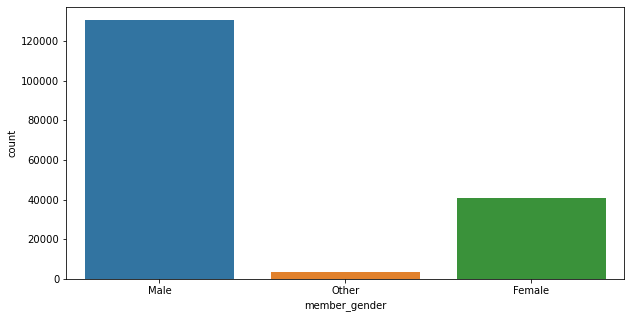

In [48]:
plt.figure(figsize=(10,5))
sb.countplot(data=df,x='member_gender')

the above plot show that the gender of the most riders are male 

<AxesSubplot:xlabel='user_type', ylabel='count'>

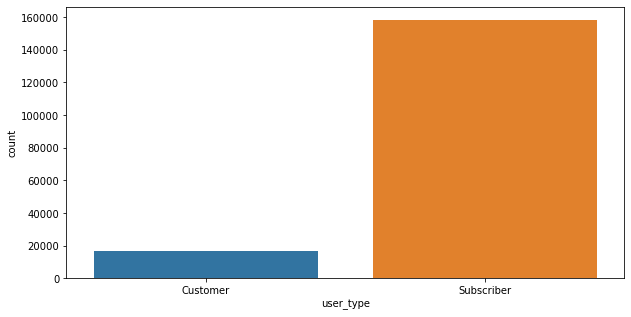

In [49]:
plt.figure(figsize=(10,5))
sb.countplot(data=df,x='user_type')

the above plot shows us the most members are subscribers 

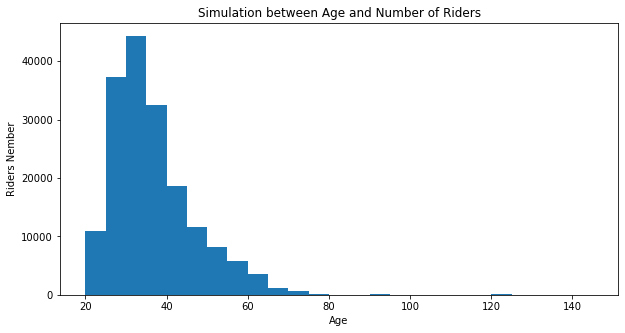

In [50]:
plt.figure(figsize=(10,5))
bins = np.arange(df['member_age'].min(),df['member_age'].max()+5,5)
plt.hist(data=df,x='member_age',bins=bins)
plt.xlabel('Age')
plt.ylabel('Riders Nember')
plt.title('Simulation between Age and Number of Riders');

the above plot shows us the Age of the most Riders lie between 20 years and 40 years

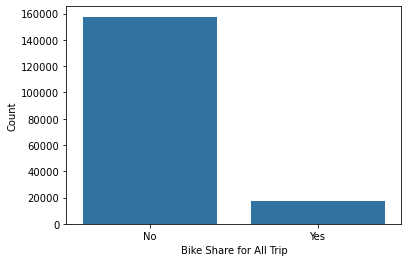

In [51]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

the above plot shows that the bike sharing for all trips seems to be small compared to non sharing trips  

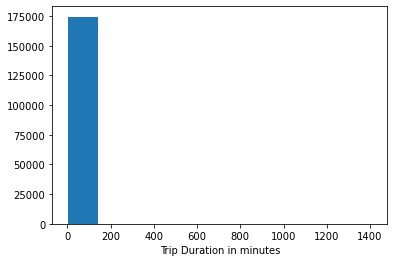

In [52]:
plt.hist(data=df, x='duration_sec');
plt.xlabel('Trip Duration in minutes');

In [53]:
(df['duration_sec'].describe())

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_sec, dtype: float64

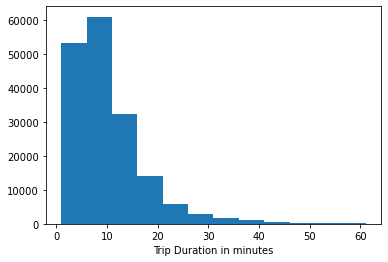

In [54]:
bins = np.arange(df['duration_sec'].min(),60+5,5)
plt.hist(data=df, x='duration_sec',bins=bins);
plt.xlabel('Trip Duration in minutes');

the above plot shows that the most duration trips are between 5 minutes to 15 minutes 

In [55]:
## Adding some columns to get more visualizations 
df['month'] = df.start_time.dt.month
df['day'] = df.start_time.dt.weekday
df['hour'] = df.start_time.dt.hour
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,month,day,hour
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,37.0,2,3,17
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,49.0,2,3,12
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,32.0,2,3,17
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,47.0,2,3,23
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,62.0,2,3,23


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  float64       
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

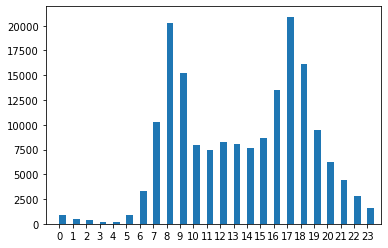

In [57]:
bins = np.arange(0,df.hour.max()+1,0.5)
plt.hist(data=df,x='hour',bins=bins)
plt.xticks(ticks=[*range(0, 24, 1)],labels=[*range(0,24,1)])
plt.xlim((-1,24));

the above plot shows that 8 Am is the most starting hour of trips 

Text(0.5, 1.0, 'Simulation of trips per day')

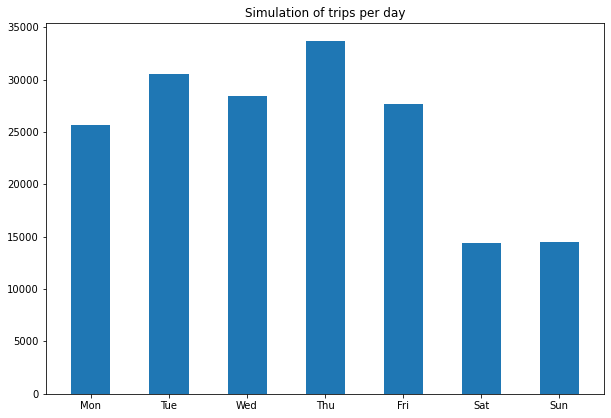

In [58]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
plt.hist(data=df,x='day',bins=np.arange(0,df.day.max()+1,0.5))
plt.xticks(ticks=[0.25,1.25,2.25,3.25,4.25,5.25,6.25],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('Simulation of trips per day')

this plot shows that there are more trips in days from monday to friday than other days 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

the number of trips reached a peak value of hour at 8 Am and 17 Pm and more trips in days from monday to friday. Also the most bikers trips are male people and the most bikers are subscribers not customers. Also the Ages of most bikers lie between 20 years and 40 years.most of bikers take a short  trip with a period around to 5 minutes to 15 minutes <br>
No transformation is needed except the steps of data wrangling described above 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

yes , As i created some additional columns like hour and days from the start_time column which helps us more to visualize the data more and i added the age column from the birth_year column to knows ages of most riders

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

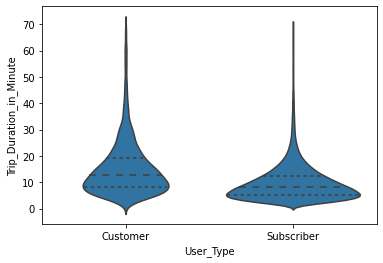

In [59]:
df = df.query('duration_sec < 70')
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='user_type', y='duration_sec', color=base_color, inner='quartile')
plt.xlabel('User_Type')
plt.ylabel('Trip_Duration_in_Minute');

the above plot shows that the trips duration in minutes for subscribers are mor than the customers  

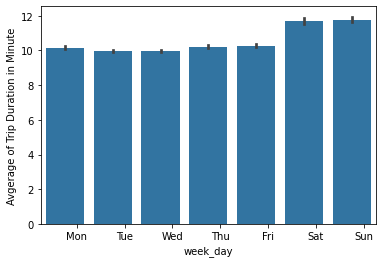

In [60]:
sb.barplot(data=df, x='day', y='duration_sec', color=base_color)
plt.xlabel('week_day')
plt.ylabel('Avgerage of Trip Duration in Minute')
plt.xticks(ticks=[0.25,1.25,2.25,3.25,4.25,5.25,6.25],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);

the above plot shows that the trips from monday to friday are smaller than the trips in saturday and sunday which gives an indication that the trips are smaller in weekdays than in weekends 

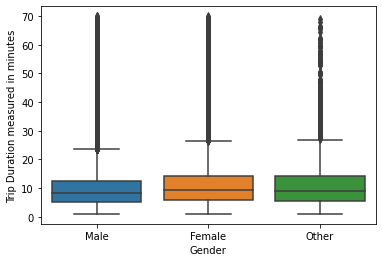

In [61]:
sb.boxplot(data=df,x='member_gender' ,y = 'duration_sec')
plt.xlabel('Gender')
plt.ylabel('Trip Duration measured in minutes');

the above plot show us that the trip duration is almost the same for all genders 

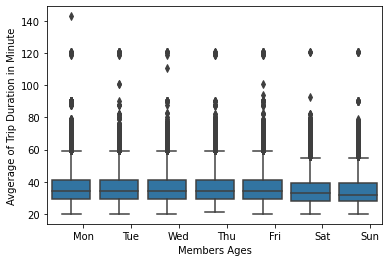

In [62]:
sb.boxplot(data=df, x='day', y='member_age', color=base_color)
plt.xlabel('Members Ages')
plt.ylabel('Avgerage of Trip Duration in Minute')
plt.xticks(ticks=[0.25,1.25,2.25,3.25,4.25,5.25,6.25],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);

the above plot shows that the riders from monday to friday are older than the riders from saturday to sunday 

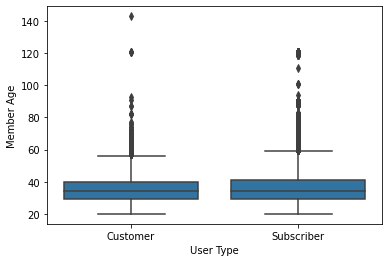

In [63]:
sb.boxplot(data=df, x='user_type', y='member_age', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Member Age');

the above plot shows that the Ages of Subscribers are almost the same to the ages of customers 

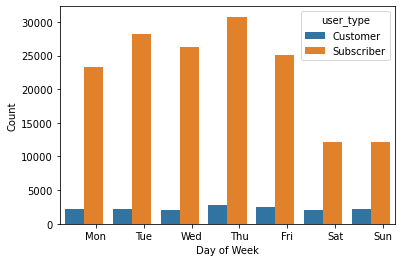

In [64]:
sb.countplot(data=df, x='day', hue='user_type')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(ticks=[0.25,1.25,2.25,3.25,4.25,5.25,6.25],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);

the above curve shows that the number of subscribers decrease in saturday and sunday which indicates that they use bikes mostly inthe day work 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

first i found that the trip durations for subscribers are more tha for customers. also i found that  the trips from monday to friday are smaller than the trips in saturday and sunday which gives an indication that the trips are smaller in weekdays than in weekends. also i found that the subscribers use the bike for work from monday to friday not like the customers use it in the weekend which may be for fun and the subscribers are older than and longer in the trips from the customers  
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

i think the intersting thing is that the subscribers use the bike for work from monday to friday not like the customers use it in the weekend which may be for fun and the subscribers are older than and longer in the trips from the customers 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

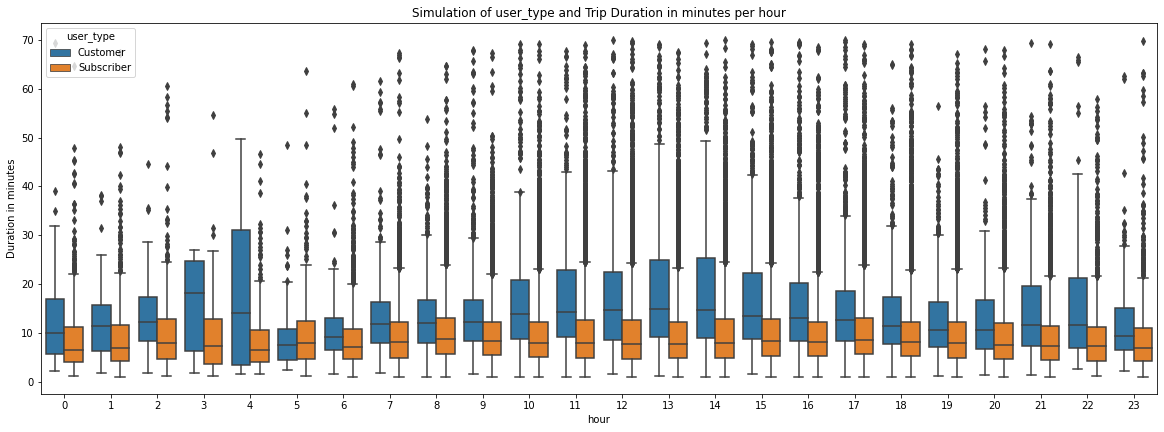

In [65]:
df = df.query('duration_sec < 70')
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sb.boxplot(data=df,x="hour", y="duration_sec", hue="user_type")
plt.title('Simulation of user_type and Trip Duration in minutes per hour',fontdict={'fontsize':12})
plt.ylabel('Duration in minutes');

the above curve shows that there no big changes in the duration per hour for the subscribers but there is a big 
change in duration per hour for the customers     

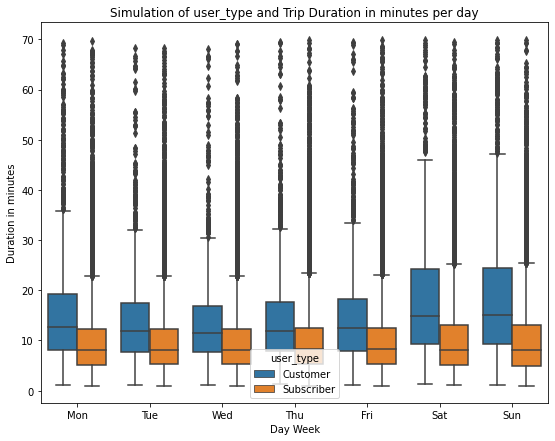

In [66]:
df = df.query('duration_sec < 70')
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sb.boxplot(data = df, x="day", y="duration_sec", hue="user_type")
plt.xticks(ticks=[*range(0,7)],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('Simulation of user_type and Trip Duration in minutes per day',fontdict={'fontsize':12})
plt.xlabel("Day Week")
plt.ylabel('Duration in minutes');

the above curve shows that there no big changes in the duration per day for the subscribers but there is a big 
change in duration per day for the customers as it increases high in saturday and sunday    

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

there no big changes in the duration per hour for the subscribers but there is a big change in duration per hour for the customers as it incearses at 3 AM and 4 AM .also there no big changes in the duration per day for the subscribers but there is a big change in duration per day for the customers as it increases high in saturday and sunday    
### Were there any interesting or surprising interactions between features?

subscribers in hourly basis have short trip duration trips <br>
customers in hourly basis have long duration trips but not for all hours <br>
subscribers in dayly basis have short trip duration trips except in weekends <br>
customers in weekly basis have no great changes in duration trips except in weekends <br>

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!